Resources: the codes in my educational projects Github, stack overflow, geekforgeeks,..

In [28]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing

%matplotlib widget

csv file and information

In [29]:
df = pd.read_csv('bank_transactions_data_2.csv')

In [30]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX001063,AC00456,68.10,1/2/2023 16:00,Pay,Milwaukee,D000235,94.227.164.192,M089,ATM,20,Student,47,1,1382.80,11/4/2024 8:10
1,TX001369,AC00316,487.16,1/2/2023 16:01,Receive,Los Angeles,D000361,156.96.135.18,M077,Branch,28,Student,84,1,321.21,11/4/2024 8:12
2,TX001623,AC00087,154.21,1/2/2023 16:01,Pay,Miami,D000549,190.251.45.32,M083,Online,46,Engineer,75,1,8045.77,11/4/2024 8:10
3,TX000983,AC00281,453.49,1/2/2023 16:06,Pay,Seattle,D000471,40.226.196.34,M088,Branch,66,Doctor,147,1,6366.43,11/4/2024 8:08
4,TX000877,AC00304,204.06,1/2/2023 16:07,Pay,Washington,D000685,150.231.20.169,M069,Online,77,Retired,159,1,4351.83,11/4/2024 8:07


In [31]:
df.dtypes

TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object

In [32]:
selected_columns = ['TransactionAmount', 'TransactionDate', 'TransactionType']
df = df[selected_columns]

In [33]:
"""#to numbers
label_encoder = preprocessing.LabelEncoder()


obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
    df[col] = label_encoder.fit_transform(df[col])"""

"#to numbers\nlabel_encoder = preprocessing.LabelEncoder()\n\n\nobj = (df.dtypes == 'object')\nfor col in list(obj[obj].index):\n    df[col] = label_encoder.fit_transform(df[col])"

In [34]:
df.dtypes

TransactionAmount    float64
TransactionDate       object
TransactionType       object
dtype: object

In [35]:
"""for col in df.columns:
    df[col] = df[col].fillna(df[col].mean())

df.isna().sum()"""

'for col in df.columns:\n    df[col] = df[col].fillna(df[col].mean())\n\ndf.isna().sum()'

In [36]:
df.head(10)

,TransactionAmount,TransactionDate,TransactionType
0,68.10,1/2/2023 16:00,Pay
1,487.16,1/2/2023 16:01,Receive
2,154.21,1/2/2023 16:01,Pay
3,453.49,1/2/2023 16:06,Pay
4,204.06,1/2/2023 16:07,Pay
5,655.15,1/2/2023 16:22,Pay
6,73.88,1/2/2023 16:27,Pay
7,757.79,1/2/2023 16:30,Pay
8,545.87,1/2/2023 16:31,Pay
9,129.94,1/2/2023 16:36,Pay


In [37]:
df.describe()

,TransactionAmount
count,2512.000000
mean,297.593778
std,291.946243
min,0.260000
25%,81.885000
50%,211.140000
75%,414.527500
max,1919.110000


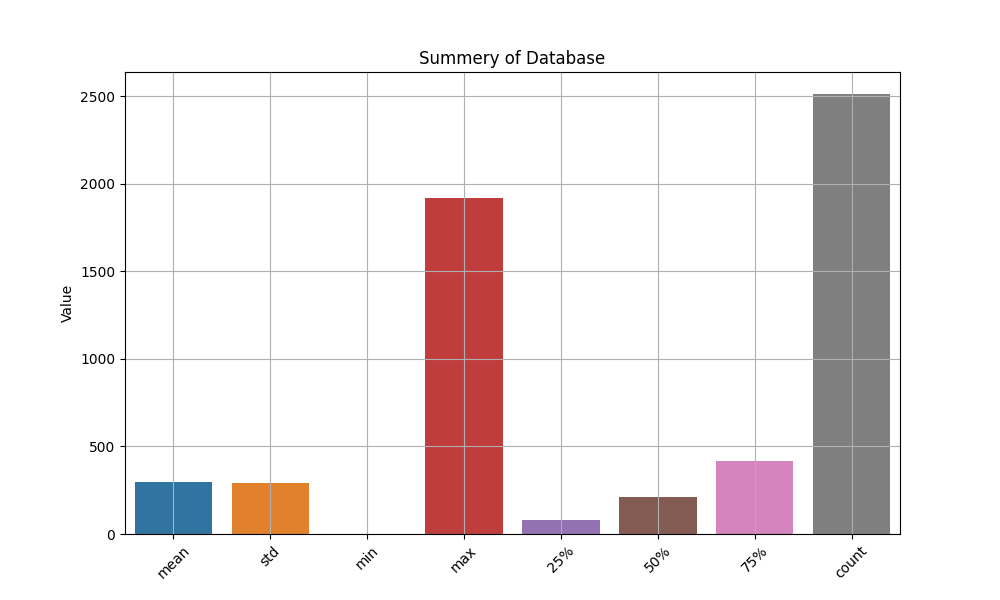

In [38]:
import seaborn as sns
summery = df.describe().transpose()

plt.figure(figsize=(10,6))
sns.barplot(data=summery[['mean', 'std', 'min','max',  '25%','50%', '75%', 'count']])
plt.title('Summery of Database')
plt.ylabel('Value')
plt.xticks(rotation= 45)
plt.grid()
plt.show()


In [39]:
df.isnull().sum()

TransactionAmount    0
TransactionDate      0
TransactionType      0
dtype: int64

In [40]:
print(df['TransactionType'].value_counts())


TransactionType
Pay        1944
Receive     568
Name: count, dtype: int64


maximum Receive and Pays

source: Github

In [41]:
pay_transactions = df[df['TransactionType'] == 'Pay']
max_pay = pay_transactions['TransactionAmount'].max()
max_pay_radif = pay_transactions[pay_transactions['TransactionAmount'] == max_pay]
max_pay_date = max_pay_radif['TransactionDate'].iloc[0]

print("Max-Pay-and-date:  ", max_pay,'$','...',max_pay_date)

Max-Pay-and-date:   1919.11 $ ... 6/27/2023 17:48


In [42]:
receive_transactions = df[df['TransactionType'] == 'Receive']
max_receive = receive_transactions['TransactionAmount'].max()
max_receive_radif = receive_transactions[receive_transactions['TransactionAmount'] == max_receive]
max_receive_date = max_receive_radif['TransactionDate'].iloc[0]

print("Max-Receive-and-date:  ", max_receive,'$','...',max_receive_date)

Max-Receive-and-date:   1831.02 $ ... 9/15/2023 17:31


In [43]:
#روش طولانی تر
'''
# monthly transaction analysis
 
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Month'] = df['TransactionDate'].dt.strftime('%Y-%m')

monthly_transactions = df['Month'].value_counts().sort_index()
'''

'''
# daily transaction analysis

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Day'] = df['TransactionDate'].dt.strftime('%d-%m')

daily_transactions = df['Day'].value_counts().sort_index()'''

"\n# daily transaction analysis\n\ndf['TransactionDate'] = pd.to_datetime(df['TransactionDate'])\ndf['Day'] = df['TransactionDate'].dt.strftime('%d-%m')\n\ndaily_transactions = df['Day'].value_counts().sort_index()"

In [44]:
#روش بهتر
'''
df['Date'] = pd.to_datetime(df['TransactionDate'])

df['Month'] = df['Date'].dt.strftime('%Y-%m')
df['Day'] = df['Date'].dt.strftime('%Y-%m-%d')

import numpy as np
df['is_quarter_end'] = np.where(df['Date'].dt.month % 3 == 0, 1, 0)

df'''


"\ndf['Date'] = pd.to_datetime(df['TransactionDate'])\n\ndf['Month'] = df['Date'].dt.strftime('%Y-%m')\ndf['Day'] = df['Date'].dt.strftime('%Y-%m-%d')\n\nimport numpy as np\ndf['is_quarter_end'] = np.where(df['Date'].dt.month % 3 == 0, 1, 0)\n\ndf"

plot function

In [45]:
#daily plot
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])


def daily_plot_chart(df):
    fig,ax = plt.subplots(figsize=(10,5))
    df['Hour'] = df['TransactionDate'].dt.hour 
    daily_transactions = df[df['TransactionType'] == 'Receive'].groupby('Hour')['TransactionAmount'].max()
    
    ax.bar(daily_transactions.index, daily_transactions.values, color='violet')
    ax.set_title('Daily Transactions Analysis by Hour')
    ax.set_xlabel('Day')
    ax.set_ylabel('Max transaction in a day')
    ax.set_xticks(range(24))  
    ax.set_xticklabels(range(24), rotation=45)


    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    canvas.get_tk_widget().pack()





In [46]:
#add to df
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Day'] = df['TransactionDate'].dt.strftime('%d')

In [47]:
#monthly plot

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


def monthly_plot_chart(df):

    fig, ax= plt.subplots(figsize= (10,5))

    df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])

    df['Month'] = df['TransactionDate'].dt.strftime('%m')
    monthly_transactions = df['Month'].value_counts().sort_index()
    ax.bar(monthly_transactions.index, monthly_transactions.values, color='violet')

    ax.set_title('Monthly Transactions Analysis')
    ax.set_xlabel('Month')
    ax.set_ylabel('number of Transactions in Each Month')
    ax.set_xticklabels(monthly_transactions.index, rotation=45)

   
    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    canvas.get_tk_widget().pack()


In [48]:
#add to df
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Month'] = df['TransactionDate'].dt.strftime('%m')

The source of using TKinter in the program is from GeeksforGeeks  (منبع)


tkinter pages  (page1)

In [49]:
import tkinter as tk
from tkinter import ttk

def select(event):

    global fig
    global canvas
    
    selected_item = combo_box.get()
    

    if selected_item == "max Receive":
        result_label.config(text=f"Max Receive: {max_receive} $ ...{max_receive_date}")
    

    elif selected_item == "Max Pay":
        result_label.config(text=f"Max Pay: {max_pay} $ ...{max_pay_date}")
    
    #elif selected_item == "Daily Plot":
        #fig = daily_plot_chart(df)
        #canvas = FigureCanvasTkAgg(fig, master=frame)
        #canvas.draw()
        #canvas.get_tk_widget.pack()

    elif selected_item == 'Monthly Plot' :
        fig = monthly_plot_chart(df)
        canvas = FigureCanvasTkAgg(fig, master=frame)
        canvas.draw()
       


root = tk.Tk()
root.title("Combobox Example")


label = tk.Label(root, text="Selected Item: ")
label.pack(pady=10)

combo_box = ttk.Combobox(root, values=["max Receive", "Max Pay", "Monthly Plot"])     #"Daily Plot"
combo_box.pack(pady=30)


combo_box.set("Select one")


result_label = tk.Label(root, text="")
result_label.pack(pady=10)

frame = tk.Frame(root)  
frame.pack()


combo_box.bind("<<ComboboxSelected>>", select)

root.mainloop()

C:\Users\golestan\AppData\Local\Temp\ipykernel_18220\882358182.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(monthly_transactions.index, rotation=45)


(page2)

In [50]:
from tkinter import *



root = Tk()
scrollbar = Scrollbar(root)
scrollbar.pack(side=RIGHT, fill=Y)
mylist = Listbox(root, yscrollcommand=scrollbar.set)


#for line in range(100):
    #mylist.insert(END, 'This is line number' + str(line)) 

for line in df['TransactionDate']:
    mylist.insert(END, str(line))



result_label = Label(root, text="اطلاعات تراکنش انتخاب‌ شده نمایش داده می‌شود", fg="black", wraplength=350, justify="left")
result_label.pack(pady=10)

frame = Frame(root)  # فریم برای نمایش نمودار
frame.pack()

def show_details(harchiz):

    global fig
    selected_index = mylist.curselection()  
    if selected_index:  
        selected_date = mylist.get(selected_index)  
        row = df[df["TransactionDate"] == selected_date]  
        if not row.empty:
            amount = row["TransactionAmount"].values[0]
            t_type = row["TransactionType"].values[0]
            result_label.config(text=f" Amount: {amount}\n Date: {selected_date}\n type: {t_type}")

            
mylist.bind("<<ListboxSelect>>", show_details)

mylist.pack(side=LEFT, fill=BOTH, expand=True)
scrollbar.config(command=mylist.yview)
root.mainloop()



The source of using this code is from Github (منبع) https://github.com/Mindinventory/Bank-Marketing-Data-Visualisation/blob/main/DataVisualization_Bank_Marketing_Dataset.ipynb

In [51]:
def plots(df):
    for nf in df:
        plt.figure(figsize=(10, 5))
        plt.hist(df[nf], color='#c6ac8f')
        plt.title(f'Distribution of {nf}')
        plt.xlabel(nf)
        plt.ylabel('Frequency')
        plt.grid(True)
        #plt.show()

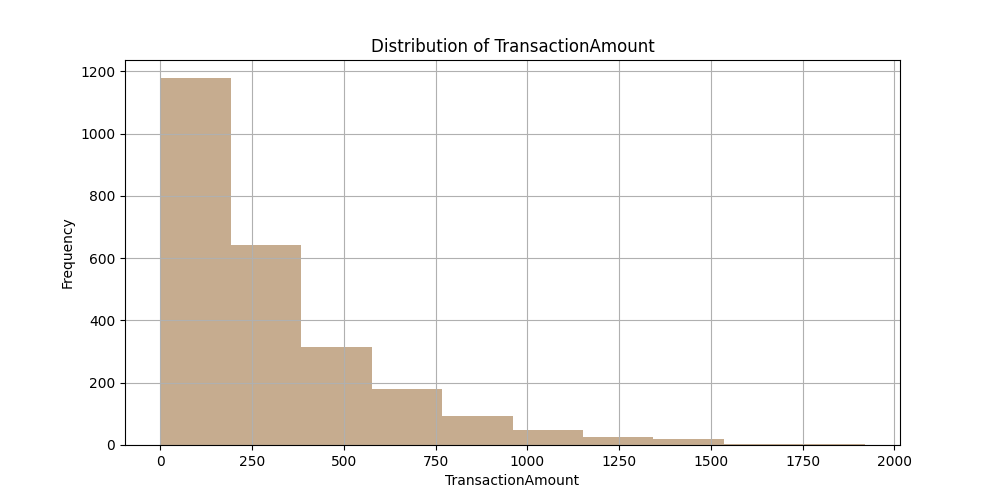

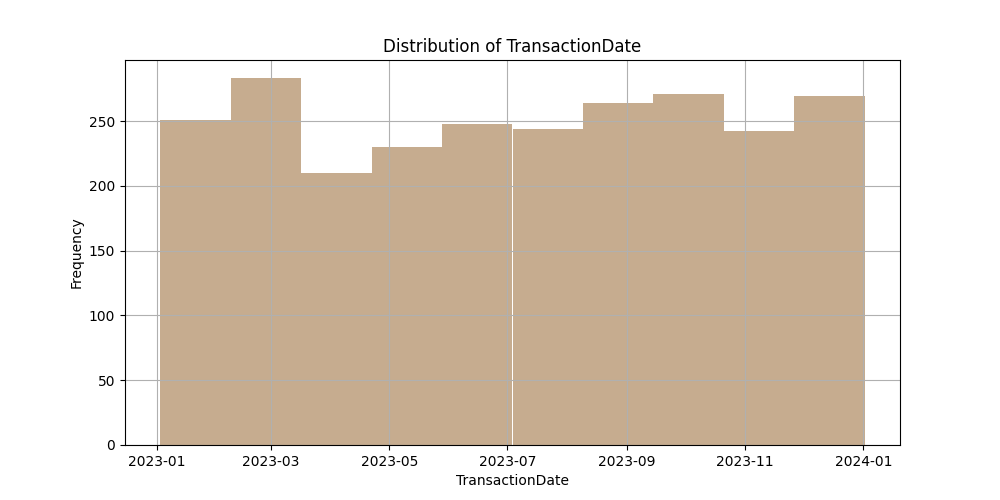

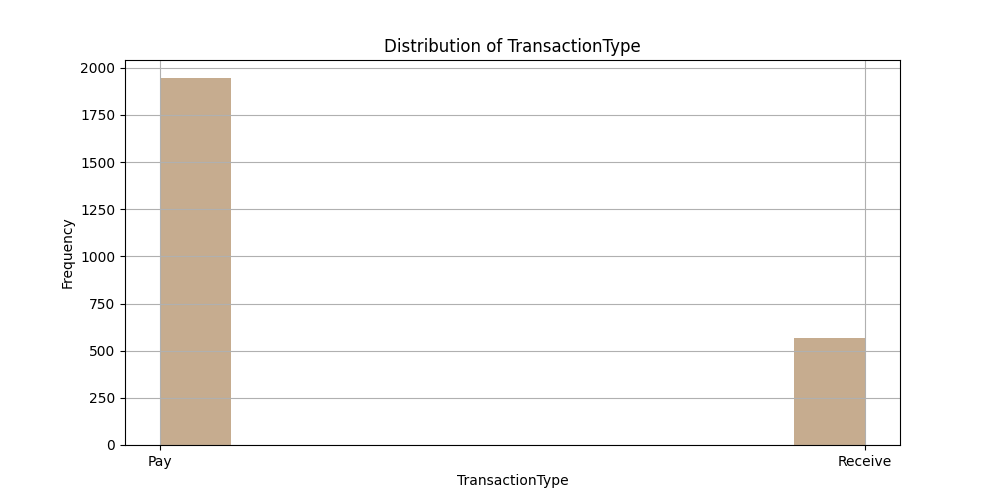

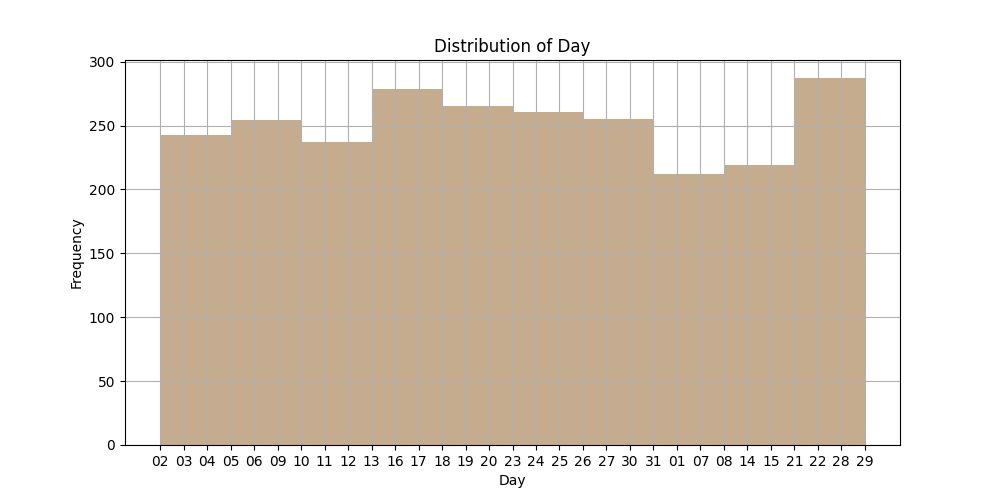

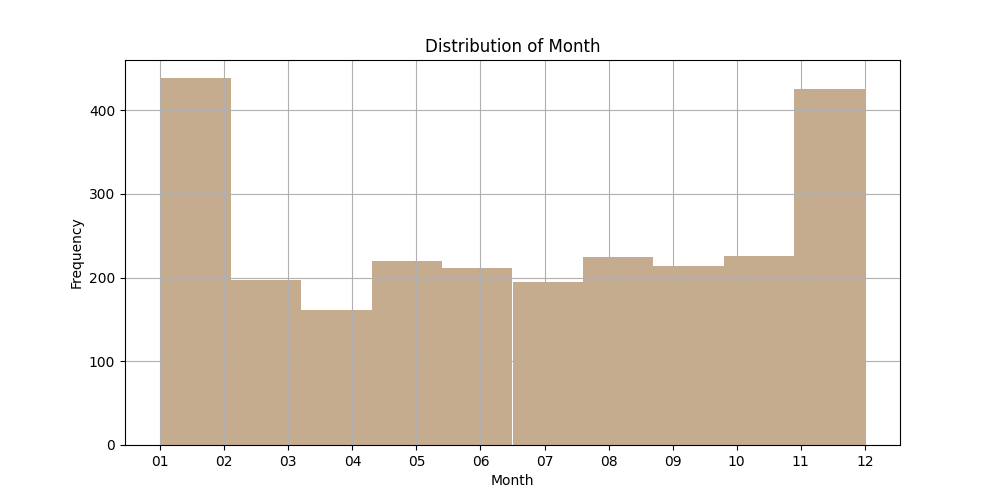

In [52]:
plots(df)

Source: Github, geekforgeeks, youtube

In [53]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def plots(df, root_frame):

    row, col = 0, 0

    for nf in df:
        fig, ax = plt.subplots(figsize= (5, 3.8))
        ax.hist(df[nf], color='#c6ac8f')
        ax.set_title(f'Distribution of {nf}')
        ax.set_xlabel(nf)
        ax.set_ylabel('Frequency')
        ax.grid(True)

        canvas = FigureCanvasTkAgg(fig, master=root_frame)
        plot_widget = canvas.get_tk_widget()
        plot_widget.grid(row=row, column=col, padx=10, pady=10)

        col = col+ 1
        if col > 2:
            col = 0
            row = row+ 1

        canvas.draw()


root = tk.Tk()
root.title('Plots in TKinter')

main_frame = ttk.Frame(root)
main_frame.pack(fill=tk.BOTH, expand=True, padx=10, pady=10)

plots(df, main_frame)

root.mainloop()